# Analyzing and Comparing EMLO Collections

The EMLO project contains dozens of correspondence collections centered around different historical figures. Each collection is maintained either by a single institute, or is a merging of smaller collections maintained across multiple institutions. 

The metadata of the correspondences has been mapped to a single schema.

Making a comparison of different sets of correspondences, at different scales, draws the focus on different aspects of comparison. At the same time, it brings to the surface some differences in how the digital collections were shaped by selection criteria.

At a small scale, it is easy to see for instance that a collection around a historical figure, e.g. Samuel Hartlib or Françoise de Graffigny has not only letters authored by or addressed to that figure, but also some letters between the correspondents in their networks. When working with many correspondence collections with thousands or tens of thousands of letters, this is a detail that is easily lost in overviews of metadata records and most summary statistics.


In [2]:
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt



In [3]:
# Step 1: merge all letters from the different collections into a single data frame for analysis
col_files = glob.glob('../emlo_collections/*.json')

# open data frames for the individual collections and combine them in a list
df_list = [pd.read_json(col_file) for col_file in col_files]
# concatenate the data frames into a single data frame (letters that occur in multiple collections may be repeated).
df_merged = pd.concat(df_list)

# write the concatenated data frame to file.
merged_letters_file = 'emlo_letters.csv'
df_merged.to_csv(merged_letters_file, sep='\t')


number of distinct authors: 7886
number of distinct addressees: 5152


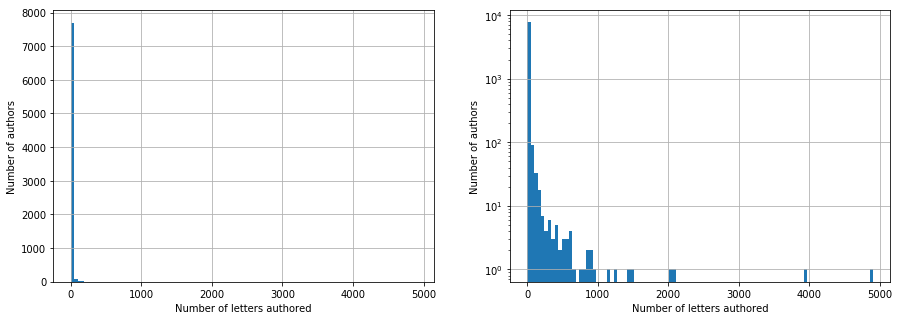

In [7]:
# Adjust the default size for figures so that placing two plots 
# next to each other in a sub plot are still big enough.
plt.rcParams['figure.figsize'] = [15, 5]

# read the merged letters file into a Pandas dataframe
merged_letters_file = 'emlo_letters.csv'
df = pd.read_csv(merged_letters_file, sep='\t')

# show the nnnumber of authors and addressees
print('number of distinct authors:', df['author'].nunique())
print('number of distinct addressees:', df['addressee'].nunique())

# create a plot canvas with two adjacent subplots
plt.subplot(1,2,1)
# Distribution of number of letters per author
# Sub-plot 1 shows the number of letters by each letter author on normal scaled axes
df['author'].value_counts().hist(bins=100)
plt.ylabel('Number of authors')
plt.xlabel('Number of letters authored')

plt.subplot(1,2,2)
# Sub-plot 1 shows the number of letters by each letter author on a log scaled y-axis
df['author'].value_counts().hist(bins=100)
plt.ylabel('Number of authors')
plt.xlabel('Number of letters authored')
plt.yscale('log')

plt.show()


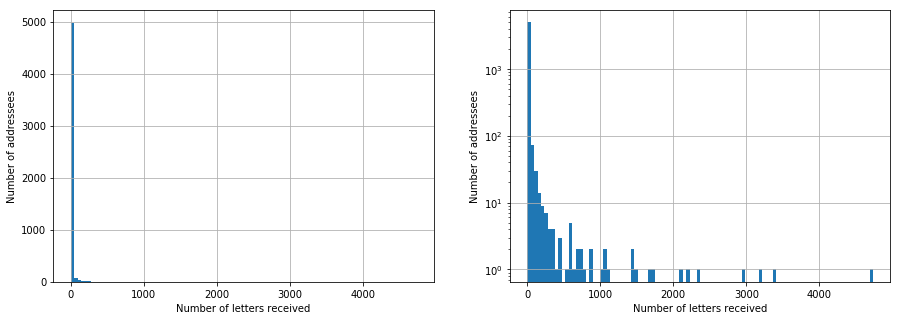

In [6]:
plt.subplot(1,2,1)
# Number of letters by each letter addressee
df['addressee'].value_counts().hist(bins=100)
plt.xlabel('Number of letters received')
plt.ylabel('Number of addressees')


# Distribution of number of letters per addressee
plt.subplot(1,2,2)
df['addressee'].value_counts().hist(bins=100)
plt.ylabel('Number of addressees')
plt.xlabel('Number of letters received')
plt.yscale('log')
plt.show()



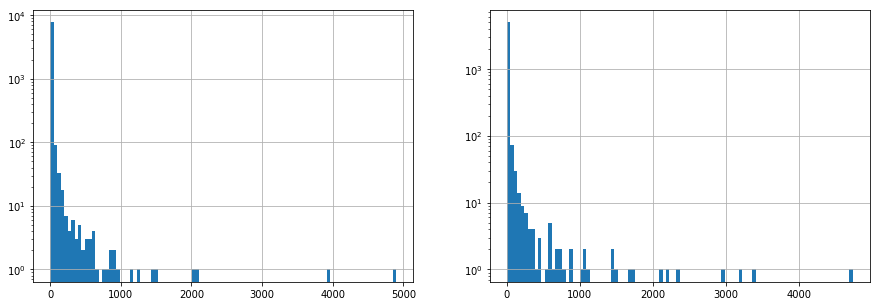

In [18]:
plt.subplot(1,2,1)
# Number of letters by each letter addressee
df['author'].value_counts().hist(bins=100)
plt.ylabel('Number of authors')
plt.xlabel('Number of letters authored')
plt.yscale('log')


# Distribution of number of letters per addressee
plt.subplot(1,2,2)
df['addressee'].value_counts().hist(bins=100)
plt.ylabel('Number of addressees')
plt.xlabel('Number of letters received')
plt.yscale('log')
plt.show()



The plots show typical skewed distributions. The vast majority of correspondents author and/or receive only one or a few letters (the hight bar on the left of each figure represents all authors/addressees authoring or receiving only one letter). Only a handful of people author or receive more than a thousand letters. 

Who are the most prolific authors?

In [112]:
df['author'].value_counts().head(20)

Groot, Hugo de, 1583-1645                            4900
Huygens, Constantijn, 1596-1687                      3946
Peiresc, Nicolas-Claude Fabri de, 1580-1637          2094
Oldenburg, Henry, 1619-1677                          2031
Vossius, Gerardus Joannes, 1577-1649                 1472
Huygens, Christiaan, 1629-1695                       1422
Wallis, John (Dr), 1616-1703                         1252
Plantin, Christophe, 1520-1589                       1167
Bayle, Pierre, 1647-1706                              938
Scaliger, Joseph Justus, 1540-1609                    931
Bourignon, Antoinette, 1616-1680                      886
Montagu, Mary Wortley (Lady), 1689-1762               860
Dury, John, 1596-1680                                 854
Descartes, René, 1596-1650                            796
Vossius, Isaac (Dr), 1618-1689                        749
Andreae, Johann Valentin, 1586-1654                   672
August II of Braunschweig-Wolfenbüttel, 1579-1666     604
Boyle, Robert,

In the list above, most of the authors are the central figure or eponym of one of the EMLO collections.

Exceptions are:

- John Dury (1596-1650): Preacher and ecumenist
- August II of Braunschweig-Wolfenbüttel (1579-1666): Duke (Herzog) of Braunschweig-Wolfenbüttel

These are prolific authors in collections centred on someone else. 

We first look at the letters of August II. Which collections are they part of?

In [27]:
print("Collections with August II of Braunschweig-Wolfenbüttel's letters:")
df[df['author'] == 'August II of Braunschweig-Wolfenbüttel, 1579-1666']['collection'].value_counts()



Collections with August II of Braunschweig-Wolfenbüttel's letters:


Andreae, Johann Valentin                        582
Kircher, Athanasius                              21
Braunschweig-Wolfenbüttel, Sophia Hedwig von      1
Name: collection, dtype: int64

Next, we look at who these letters are addressed to:

In [32]:
print("Addressees of August II of Braunschweig-Wolfenbüttel's letters:")
df[df['author'] == 'August II of Braunschweig-Wolfenbüttel, 1579-1666']['addressee'].value_counts()



Addressees of August II of Braunschweig-Wolfenbüttel's letters:


Andreae, Johann Valentin, 1586-1654                        581
Kircher, Athanasius, 1601-1680                              21
Württemberg, Eberhard III von, 1614-1674                     1
Braunschweig-Wolfenbüttel, Sophia Hedwig von, 1592-1642      1
Name: addressee, dtype: int64

These two queries reveal a typical pattern in these collections. August II has 582 letters in the collection of Johann Valentin Andreae, of which 581 are also addressed to Andreae. Letters in a collection around a certain person tend be either authored or addressed to this person, which makes sense from a recordkeeping perspective. But there is one letter addressed to someone else, i.e. Eberhard III von Württemberg.

Now, let us look at the same queries for John Dury's letters:

In [26]:
print("Collections with John Dury's letters:")
df[df['author'] == 'Dury, John, 1596-1680']['collection'].value_counts()



Collections with John Dury's letters:


Hartlib, Samuel                837
Ussher, James                    6
Mede, Joseph                     3
Culpeper, Cheney                 2
Huygens, Constantijn             2
Boyle, Robert                    2
Bisterfeld, Johann Heinrich      1
Vossius, Gerardus Joannes        1
Name: collection, dtype: int64

John Dury has letters in eight different collections, but in seven of those, it is only a handful of letters. We can also see who he addressed those letters to:

In [31]:
print("Addressees of John Dury's letters:")
df[df['author'] == 'Dury, John, 1596-1680']['addressee'].value_counts()



Addressees of John Dury's letters:


Hartlib, Samuel, 1600-1662                                                             528
Roe, Thomas (Sir), 1581-1644                                                            30
Culpeper, Cheney, 1601-1663                                                             11
Waller, William (Sir), 1598-1668                                                         7
St Amand, Joseph, fl. 1636-1643                                                          7
Borthwick, Eleazar, fl. 1633-1642                                                        7
Ussher, James, 1581-1656                                                                 6
Rudbeck, Johannes, 1581-1646                                                             6
Worsley, Benjamin, 1618-1677                                                             6
Laud, William, 1573-1645                                                                 6
Lawrence, Henry, 1600-1664                                                               5

Now we see a differennt pattern. Samuel Hartlib is by far the most frequent addressee of John Dury's letters in these collections. But looking at the two sets of counts above, we note that John Dury authored 837 letters in the Samuel Hartlib collections, of which only 528 are addressed to Samuel Hartlib. Who are the other 309 letters in the Samuel Hartlib collection addressed to? 

In [9]:
print("Addressees of John Dury's letters in the Samuel Hartlib:")
df[(df['author'] == 'Dury, John, 1596-1680') & (df['collection'] == 'Hartlib, Samuel')]['addressee'].value_counts()


Addressees of John Dury's letters in the Samuel Hartlib:


Hartlib, Samuel, 1600-1662                                    528
Roe, Thomas (Sir), 1581-1644                                   30
Culpeper, Cheney, 1601-1663                                     9
Waller, William (Sir), 1598-1668                                7
St Amand, Joseph, fl. 1636-1643                                 7
Borthwick, Eleazar, fl. 1633-1642                               7
Worsley, Benjamin, 1618-1677                                    6
Rudbeck, Johannes, 1581-1646                                    6
Laud, William, 1573-1645                                        6
Dury, Dorothy Moore (née King), 1612-1664                       5
Lawrence, Henry, 1600-1664                                      5
Boreel, Adam, 1603-1667                                         5
Appelius, Margaret, née Dury, fl. 1638-1644                     4
Thurloe, John, 1616-1668                                        4
Zurich, Ministers in                                            4
Godemann, 

Apparently, some collections also contains hundreds of letters that are not authored by or addressed to the collection eponym.


In [28]:
df['addressee'].value_counts().head(20)

Huygens, Constantijn, 1596-1687                   4733
Hartlib, Samuel, 1600-1662                        3388
Groot, Hugo de, 1583-1645                         3180
Andreae, Johann Valentin, 1586-1654               2953
Vossius, Gerardus Joannes, 1577-1649              2361
Kircher, Athanasius, 1601-1680                    2209
Oldenburg, Henry, 1619-1677                       2125
Lhwyd, Edward, 1659-1709                          1751
Solms-Braunfels, Amalia von, 1602-1675            1659
Huygens, Christiaan, 1629-1695                    1480
Boyle, Robert, 1627-1691                          1429
Sirleto, Guglielmo, 1514-1585                     1425
Vossius, Isaac (Dr), 1618-1689                    1123
Lister, Martin, 1639-1712                         1062
Mersenne, Marin, 1588-1648                        1049
Anhalt-Dessau, Henriette Amalia von, 1666-1726    1008
Reigersberch, Nicolaas, 1584-1654                  889
Wallis, John (Dr), 1616-1703                       884
Scaliger, 

In the list above, most of the addressees are the central figure or eponym of one of the EMLO collections.

Exceptions are:

- Nicolaas Reigersberch (1584-1654): brother-in-law of Hugo de Groot; Jurist
- Willem de Groot (1597-1662): brother of Hugo de Groot (1583-1645); Dutch jurist

These are prolific authors in collections centred on someone else. 

In [29]:
print("Collections with letters to Nicolaas Reigersberch:")
df[df['addressee'] == 'Reigersberch, Nicolaas, 1584-1654']['collection'].value_counts()



Collections with Nicolaas Reigersberch's letters:


Groot, Hugo de               881
Vossius, Gerardus Joannes      8
Name: collection, dtype: int64

In [33]:
print("Authors of letters to Nicolaas Reigersberch:")
df[df['addressee'] == 'Reigersberch, Nicolaas, 1584-1654']['author'].value_counts()



Authors of letters to Nicolaas Reigersberch:


Groot, Hugo de, 1583-1645               862
Reigersberch, Maria, 1589-1653           18
Vossius, Gerardus Joannes, 1577-1649      8
Groot, Willem de, 1597-1662               1
Name: author, dtype: int64

In [34]:
print("Collections with letters to Willem de Groot:")
df[df['addressee'] == 'Groot, Willem de, 1597-1662']['collection'].value_counts()



Collections with letters to Willem de Groot:


Groot, Hugo de               732
Vossius, Gerardus Joannes      3
Name: collection, dtype: int64

In [35]:
print("Authors of letters to Willem de Groot:")
df[df['addressee'] == 'Groot, Willem de, 1597-1662']['author'].value_counts()



Authors of letters to Willem de Groot:


Groot, Hugo de, 1583-1645                     726
Groot, Johan Hugo de, 1554-1640                 4
Vossius, Gerardus Joannes, 1577-1649            3
Groot van Kraayenburg, Dirck de, 1618-1661      2
Name: author, dtype: int64

Again, we see some letters between persons who are not the central figure in any of the EMLO collections. 

How many letters in each collection do not involve the eponym as either author or addressee?

First, we map the name of the collection to the name as used as author or addressee:

In [10]:
eponyms = list(df['collection'].unique())
authors = list(df['author'].unique())
author_counts = df['author'].value_counts()
authors

best_map = {}
eponym_map = {}
for eponym in eponyms:
    #print(eponym)
    for author in authors:
        if not isinstance(author, str) or ';' in author:
            continue
        if eponym == 'Fermat, Pierre de' and author == 'Fermat, Pierre, 1601-1665':
            eponym_map[eponym] = author
        if eponym == 'Comenius, Jan Amos' and author == 'Komenský, Jan Amos, 1592-1670':
            eponym_map[eponym] = author
        if eponym in author[:len(eponym)]:
            if eponym not in best_map or author_counts[author] > best_map[eponym]:
                best_map[eponym] = author_counts[author]
                eponym_map[eponym] = author
    if eponym not in eponym_map:
        print(eponym)

In [26]:
print("Collection:\t\t\t\t\t\tAll letters\tNon-eponym letters")
print("----------------------------------------------------------------------------------------")
for eponym in eponym_map:
    epo_df = df[df['collection'] == eponym]
    #print(eponym, '\t', eponym_map[eponym])
    non_epo_df = df[(df['collection'] == eponym) & (df['author'] != eponym_map[eponym]) & (df['addressee'] != eponym_map[eponym])]
    perc = non_epo_df.shape[0] / epo_df.shape[0]
    print(f"{eponym: <50}\t{epo_df.shape[0]}\t\t{non_epo_df.shape[0]}\t({perc:.2f})")


Collection:						All letters	Non-eponym letters
----------------------------------------------------------------------------------------
Bayle, Pierre                                     	1791		133	(0.07)
Sirleto, Guglielmo                                	1438		15	(0.01)
Seidenbecher, Georg Lorenz                        	47		0	(0.00)
Swammerdam, Jan                                   	172		4	(0.02)
Fermat, Pierre de                                 	121		6	(0.05)
Ortelius, Abraham                                 	467		0	(0.00)
Reneri, Henricus                                  	61		0	(0.00)
Spinoza, Baruch                                   	58		1	(0.02)
Lister, Martin                                    	1212		2	(0.00)
Wallis, John                                      	1998		232	(0.12)
Ussher, James                                     	681		17	(0.02)
Groot, Hugo de                                    	8034		280	(0.03)
Franckenberg, Abraham von                         	85		1	(0.01)
Bourignon

Most collection have almost exclusively letters involving the eponym, but some collections are very different. In the Peter Paul Rubens collection, the majority (59%) of letters are between other people than Rubens. 

In [35]:
df[df['collection'] == 'Rubens, Peter Paul'][['collection','author','addressee']].head(10)

,collection,author,addressee
79236,"Rubens, Peter Paul","Moretus, Balthasar, 1574-1641","Rubens, Philip, 1574-1611"
79237,"Rubens, Peter Paul","Rubens, Philip, 1574-1611","Rubens, Peter Paul, 1577-1640"
79238,"Rubens, Peter Paul","Albert VII, Archduke of Austria, 1559-1621","Richardot, Jean, 1570-1614"
79239,"Rubens, Peter Paul","Gonzaga, Vincenzo I, 1562-1612","Damasceni Peretti, Alessandro, 1571-1623"
79240,"Rubens, Peter Paul","Damasceni Peretti, Alessandro, 1571-1623","Gonzaga, Vincenzo I, 1562-1612"
79241,"Rubens, Peter Paul","Arrigoni, Lelio, b.1541","Chieppio, Annibal, 1563-1623"
79242,"Rubens, Peter Paul","Rubens, Philip, 1574-1611","Rubens, Peter Paul, 1577-1640"
79243,"Rubens, Peter Paul","Arrigoni, Lelio, b.1541","Chieppio, Annibal, 1563-1623"
79244,"Rubens, Peter Paul","Richardot, Jean, 1570-1614","Gonzaga, Vincenzo I, 1562-1612"
79245,"Rubens, Peter Paul","Arrigoni, Lelio, b.1541","Chieppio, Annibal, 1563-1623"


## Normalizing and scale

At a small scale, there is no need to normalize data, as the researcher can do that mentally while working with the materials.

At an intermediate scale of hundreds or thousands of documents, the variations in names of persons and places, ways in which dates are recorded are becoming a hurdle to analysis. For topical analysis, this is also an issue, as many connections between documents are hard to bring to the surface because of morphological and spelling variations. 

At a large scale with hundreds of thousands or millions of documents, the textual variations become less of a hurdle, as there is enough data to identify and map variants. 

At a very large scale with tens or hundreds of millions of documents, the textual variations become meaningful and allow measuring contextual nuance in how word variants are used to convey different aspects.

In [36]:
# Do some analysis with book reviews


## Connections between collections

How many connections are there between collections? This is easy with two collections, but becomes more difficult when there are many collections.

Which persons appear in multiple collections?

In [54]:
# which authors occur in multiple collections
df[(df[['collection', 'author']].duplicated(keep='first') == False)]['author'].value_counts()


Unknown                                                                                                                                                     37
Oldenburg, Henry, 1619-1677                                                                                                                                 16
Huygens, Constantijn, 1596-1687                                                                                                                             14
Mersenne, Marin, 1588-1648                                                                                                                                  13
Gronovius, Johann Frederick, 1611-1671                                                                                                                      12
Groot, Hugo de, 1583-1645                                                                                                                                   11
Leibniz, Gottfried Wilhelm, 1646-1716         

In [56]:
df[df['author'] == 'Oldenburg, Henry, 1619-1677']['collection'].value_counts()

Oldenburg, Henry                      1524
Wallis, John                           142
Boyle, Robert                          107
Huygens, Christiaan                    105
Lister, Martin                          61
Hartlib, Samuel                         46
Newton, Isaac                           16
Swammerdam, Jan                          8
Milton, John                             7
Sachs von Löwenheim, Philipp Jakob       5
Vossius, Isaac                           4
Hobbes, Thomas                           2
Ashmole, Elias                           1
Comenius, Jan Amos                       1
Vossius, Gerardus Joannes                1
Coccejus, Johannes                       1
Name: collection, dtype: int64

Samuel Hartlib is in the top 20 of addressees but not in the top 20 of authors:

In [105]:
print('Samuel Hartlib\n')
print(f'\tnumber of letters sent:', df[df['author'] == 'Hartlib, Samuel, 1600-1662'].shape[0])
print(f'\tnumber of letters received:', (df[df['addressee'] == 'Hartlib, Samuel, 1600-1662'].shape[0]))


Samuel Hartlib

	number of letters sent: 401
	number of letters received: 3388


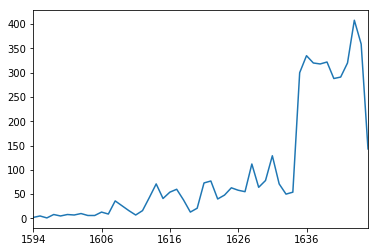

In [108]:
# Number of letters authored by Hugo de Groot per year
hugo = 'Groot, Hugo de, 1583-1645'

df['year'] = df['date'].str.extract('(\d\d\d\d)', expand=False)

df_hugo = df[df['author'] == hugo]

df_hugo['year'].value_counts().sort_index().plot()

plt.show()


In [110]:
df_hugo['addressee'].value_counts()

Reigersberch, Nicolaas, 1584-1654                                862
Groot, Willem de, 1597-1662                                      726
Oxenstierna, Axel (Count), 1583-1654                             587
Camerarius, Ludwig, 1573-1651                                    347
Vossius, Gerardus Joannes, 1577-1649                             339
Marin, Charles, d.1651                                           122
Oxenstierna, Johan Axelsson, 1611-1657                           109
Salvius, Johan Adler, 1590-1652                                  106
Wicquefort, Joachim van, 1600-1670                                99
Heinsius, Daniel, 1580-1655                                       89
Aubery du Maurier, Benjamin, 1566-1636                            85
Appelboom, Harald Andersson, 1612-1674                            83
Christina, Queen of Sweden, 1626-1689                             77
Schmalz, Peter Abel, fl. 1635-1638                                61
Uyttenbogaert, Johannes (Dr), 1557

Some collections include letters between correspondents of the collection creator, while others only contains letters where the collection creator is the author or addressee of the letter. 

E.g. the collection of correspondence of Hugo de Groot includes letters between his brother and his brother-in-law.



In [122]:
df_christiaan = df[(df['author'] == 'Huygens, Christiaan, 1629-1695') | (df['addressee'] == 'Huygens, Christiaan, 1629-1695')]

df_christiaan = df[df['collection'] == 'Huygens, Christiaan']
df_christiaan['author'].value_counts()


Huygens, Christiaan, 1629-1695                         1345
Huygens, Constantijn, 1628-1697                         175
Oldenburg, Henry, 1619-1677                             105
Huygens, Constantijn, 1596-1687                          75
Sluse, René François de, 1622-1685                       72
Chapelain, Jean, 1595-1674                               70
Moray, Robert (Sir), 1608-1673                           68
Schooten, Frans van, 1615-1660                           58
Boulliau, Ismaël, 1605-1694                              54
Leibniz, Gottfried Wilhelm, 1646-1716                    42
Bruno, Henrick, 1617-1664                                40
Huygens, Susanna, 1637-1725                              32
Heinsius, Nicolaas, 1620-1681                            28
Petit, Pierre, 1598 or before-1677                       24
Medici, Leopoldo de', 1617-1675                          24
Doublet, Philips, 1633-1707                              23
Hudde, Johannes, 1628-1704              

In [124]:
df_constantijn = df[df['collection'] == 'Huygens, Constantijn']
df_constantijn['addressee'].value_counts()


Huygens, Constantijn, 1596-1687                                          4252
Solms-Braunfels, Amalia von, 1602-1675                                    768
Huygens, Christiaan, 1551-1624                                             94
Barlaeus, Caspar, 1584-1648                                                81
Sauzin, Jean                                                               68
Heinsius, Daniel, 1580-1655                                                63
Lionne, Hugues de, 1611-1671                                               44
Rivet, André, 1572-1651                                                    44
Hooft, Pieter Cornelius, 1581-1647                                         40
William III and II, King of England, Scotland, and Ireland, 1650-1702      39
Beringhen, Henri, 1603-1692                                                33
Chièze, Sebastien, 1625-1679                                               29
Unknown                                                         